In [57]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn import metrics
import missingno as msno
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
import time
from scipy.stats import randint as sp_randint
import multiprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif
from sklearn.compose import ColumnTransformer

In [58]:
# Leemos el archivo pkl
with open('attrition_available_4.pkl', 'rb') as file:
    df = pickle.load(file)

file.close()
X = df.drop("Attrition", axis=1)
y = df["Attrition"]
df

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,NaN,13.0,2.0,4.0,3.0,2.0,NaN,31.0,Yes,Travel_Frequently,...,0.0,Y,23,8.0,1.0,6.0,NaN,5.0,1.0,4.0
6,6.450877,17.0,3.0,4.0,NaN,3.0,NaN,28.0,Yes,Travel_Rarely,...,2.0,Y,20,8.0,1.0,5.0,NaN,0.0,0.0,0.0
13,8.871421,14.0,2.0,NaN,1.0,2.0,2.0,47.0,Yes,Non-Travel,...,1.0,Y,11,NaN,2.0,10.0,4.0,10.0,9.0,9.0
28,10.713066,6.0,NaN,3.0,4.0,3.0,1.0,44.0,Yes,Travel_Frequently,...,3.0,Y,14,8.0,NaN,19.0,2.0,1.0,0.0,NaN
30,9.662808,11.0,NaN,3.0,1.0,2.0,3.0,26.0,Yes,Travel_Rarely,...,2.0,Y,11,NaN,0.0,5.0,NaN,3.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,8.316921,6.0,3.0,3.0,4.0,1.0,3.0,NaN,No,Travel_Rarely,...,NaN,Y,17,NaN,1.0,10.0,5.0,3.0,0.0,2.0
4406,5.897197,8.0,2.0,NaN,NaN,4.0,3.0,NaN,No,Travel_Rarely,...,2.0,Y,15,8.0,0.0,10.0,2.0,3.0,0.0,2.0
4407,NaN,18.0,NaN,4.0,1.0,3.0,3.0,25.0,No,NaN,...,0.0,Y,20,8.0,0.0,5.0,4.0,4.0,1.0,2.0
4408,9.187612,8.0,2.0,NaN,4.0,1.0,3.0,42.0,No,Travel_Rarely,...,NaN,Y,14,8.0,1.0,10.0,2.0,9.0,7.0,8.0


In [59]:
df.shape

(4410, 31)

In [60]:
np.random.seed(42)
X.head(10)

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1,NaN,13.0,2.0,4.0,3.0,2.0,NaN,31.0,Travel_Frequently,Research & Development,...,0.0,Y,23,8.0,1.0,6.0,NaN,5.0,1.0,4.0
6,6.450877,17.0,3.0,4.0,NaN,3.0,NaN,28.0,Travel_Rarely,Research & Development,...,2.0,Y,20,8.0,1.0,5.0,NaN,0.0,0.0,0.0
13,8.871421,14.0,2.0,NaN,1.0,2.0,2.0,47.0,Non-Travel,Research & Development,...,1.0,Y,11,NaN,2.0,10.0,4.0,10.0,9.0,9.0
28,10.713066,6.0,NaN,3.0,4.0,3.0,1.0,44.0,Travel_Frequently,NaN,...,3.0,Y,14,8.0,NaN,19.0,2.0,1.0,0.0,NaN
30,9.662808,11.0,NaN,3.0,1.0,2.0,3.0,26.0,Travel_Rarely,Research & Development,...,2.0,Y,11,NaN,0.0,5.0,NaN,3.0,0.0,2.0
35,9.570924,17.0,3.0,3.0,NaN,4.0,NaN,26.0,Travel_Rarely,Research & Development,...,NaN,Y,12,8.0,NaN,8.0,5.0,8.0,7.0,4.0
38,6.177288,22.0,2.0,3.0,NaN,3.0,3.0,18.0,Travel_Rarely,Research & Development,...,1.0,Y,14,8.0,2.0,0.0,3.0,0.0,0.0,0.0
59,7.588037,10.0,3.0,NaN,3.0,2.0,2.0,52.0,NaN,Research & Development,...,2.0,Y,18,8.0,1.0,11.0,NaN,8.0,7.0,7.0
65,10.641073,2.0,2.0,3.0,1.0,4.0,2.0,28.0,Travel_Rarely,Research & Development,...,NaN,Y,14,8.0,1.0,5.0,4.0,3.0,2.0,2.0
69,9.851604,3.0,3.0,NaN,4.0,3.0,NaN,39.0,Travel_Rarely,Research & Development,...,4.0,Y,17,NaN,1.0,12.0,0.0,1.0,0.0,0.0


In [61]:
X.dtypes

hrs                        float64
absences                   float64
JobInvolvement             float64
PerformanceRating          float64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
Age                        float64
BusinessTravel              object
Department                  object
DistanceFromHome           float64
Education                  float64
EducationField              object
EmployeeCount                int64
EmployeeID                 float64
Gender                      object
JobLevel                   float64
JobRole                     object
MaritalStatus               object
MonthlyIncome              float64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours              float64
StockOptionLevel           float64
TotalWorkingYears          float64
TrainingTimesLastYear      float64
YearsAtCompany             float64
YearsSinceLastPromot

Como es un problema de clasificación, comprobamos si está desbalanceado

In [62]:
y.value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

Como podemos ver, se encuentra desbalanceado, por lo que tendremos que tratar de balancearlo para crear modelos

In [63]:
print("Comprobamos la existencia de valores nulos por atributo: ")
df.isnull().sum()

Comprobamos la existencia de valores nulos por atributo: 


hrs                        739
absences                   729
JobInvolvement             816
PerformanceRating          734
EnvironmentSatisfaction    966
JobSatisfaction             20
WorkLifeBalance            922
Age                        721
Attrition                    0
BusinessTravel             766
Department                 835
DistanceFromHome           934
Education                  943
EducationField             814
EmployeeCount                0
EmployeeID                 764
Gender                     785
JobLevel                   814
JobRole                    865
MaritalStatus              742
MonthlyIncome              739
NumCompaniesWorked         810
Over18                     857
PercentSalaryHike            0
StandardHours              814
StockOptionLevel           838
TotalWorkingYears            9
TrainingTimesLastYear      736
YearsAtCompany             785
YearsSinceLastPromotion    841
YearsWithCurrManager       881
dtype: int64

In [64]:
print("Comprobamos la cantidad de datos únicos: ")
print(df.value_counts())

Comprobamos la cantidad de datos únicos: 
hrs        absences  JobInvolvement  PerformanceRating  EnvironmentSatisfaction  JobSatisfaction  WorkLifeBalance  Age   Attrition  BusinessTravel     Department              DistanceFromHome  Education  EducationField    EmployeeCount  EmployeeID  Gender  JobLevel  JobRole                    MaritalStatus  MonthlyIncome  NumCompaniesWorked  Over18  PercentSalaryHike  StandardHours  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  YearsWithCurrManager
5.508781   21.0      3.0             3.0                2.0                      2.0              3.0              32.0  No         Non-Travel         Research & Development  10.0              4.0        Life Sciences     1              1003.0      Female  1.0       Laboratory Technician      Single         87400.0        2.0                 Y       11                 8.0            1.0               12.0               2.0                    7.0 

In [65]:
num_unique = df.nunique()

print(num_unique)

const_cols = [col for col in num_unique.index if num_unique[col] == 1]
print("Columnas constantes:", const_cols)

hrs                        3668
absences                     24
JobInvolvement                4
PerformanceRating             2
EnvironmentSatisfaction       4
JobSatisfaction               4
WorkLifeBalance               4
Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 3646
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1345
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: i

Una variable innecesaria es la ID del trabajador, ya que no aporta nada a que el trabajador quiera abandonar el trabajo

# Procesamiento de datos

## Eliminación de columnas

In [66]:
#Eliminamos las columnas irrelevantes para el problema
df = df.drop('EmployeeID', axis=1)

#Eliminamos las columnas constantes
df = df.drop('EmployeeCount', axis=1)
df = df.drop('Over18', axis=1)
df = df.drop('StandardHours', axis=1)

#Redeclaramos X e y tras eliminar las columnas
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

#Dividimos los dantos en conjuntos para entrernar y para tests
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

## Tratamiento de valores nulos

In [67]:
#Identificamos los valores nulos
X_train.isnull().any()

hrs                         True
absences                    True
JobInvolvement              True
PerformanceRating           True
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
Age                         True
BusinessTravel              True
Department                  True
DistanceFromHome            True
Education                   True
EducationField              True
Gender                      True
JobLevel                    True
JobRole                     True
MaritalStatus               True
MonthlyIncome               True
NumCompaniesWorked          True
PercentSalaryHike          False
StockOptionLevel            True
TotalWorkingYears           True
TrainingTimesLastYear       True
YearsAtCompany              True
YearsSinceLastPromotion     True
YearsWithCurrManager        True
dtype: bool

In [68]:
#Miramos la cantidad de valores nulos por columna
X_train.isnull().sum()

hrs                        608
absences                   579
JobInvolvement             633
PerformanceRating          580
EnvironmentSatisfaction    790
JobSatisfaction             19
WorkLifeBalance            763
Age                        573
BusinessTravel             642
Department                 674
DistanceFromHome           725
Education                  744
EducationField             650
Gender                     632
JobLevel                   653
JobRole                    683
MaritalStatus              594
MonthlyIncome              593
NumCompaniesWorked         634
PercentSalaryHike            0
StockOptionLevel           673
TotalWorkingYears            7
TrainingTimesLastYear      580
YearsAtCompany             635
YearsSinceLastPromotion    672
YearsWithCurrManager       721
dtype: int64

##### Dibujamos los valores nulos

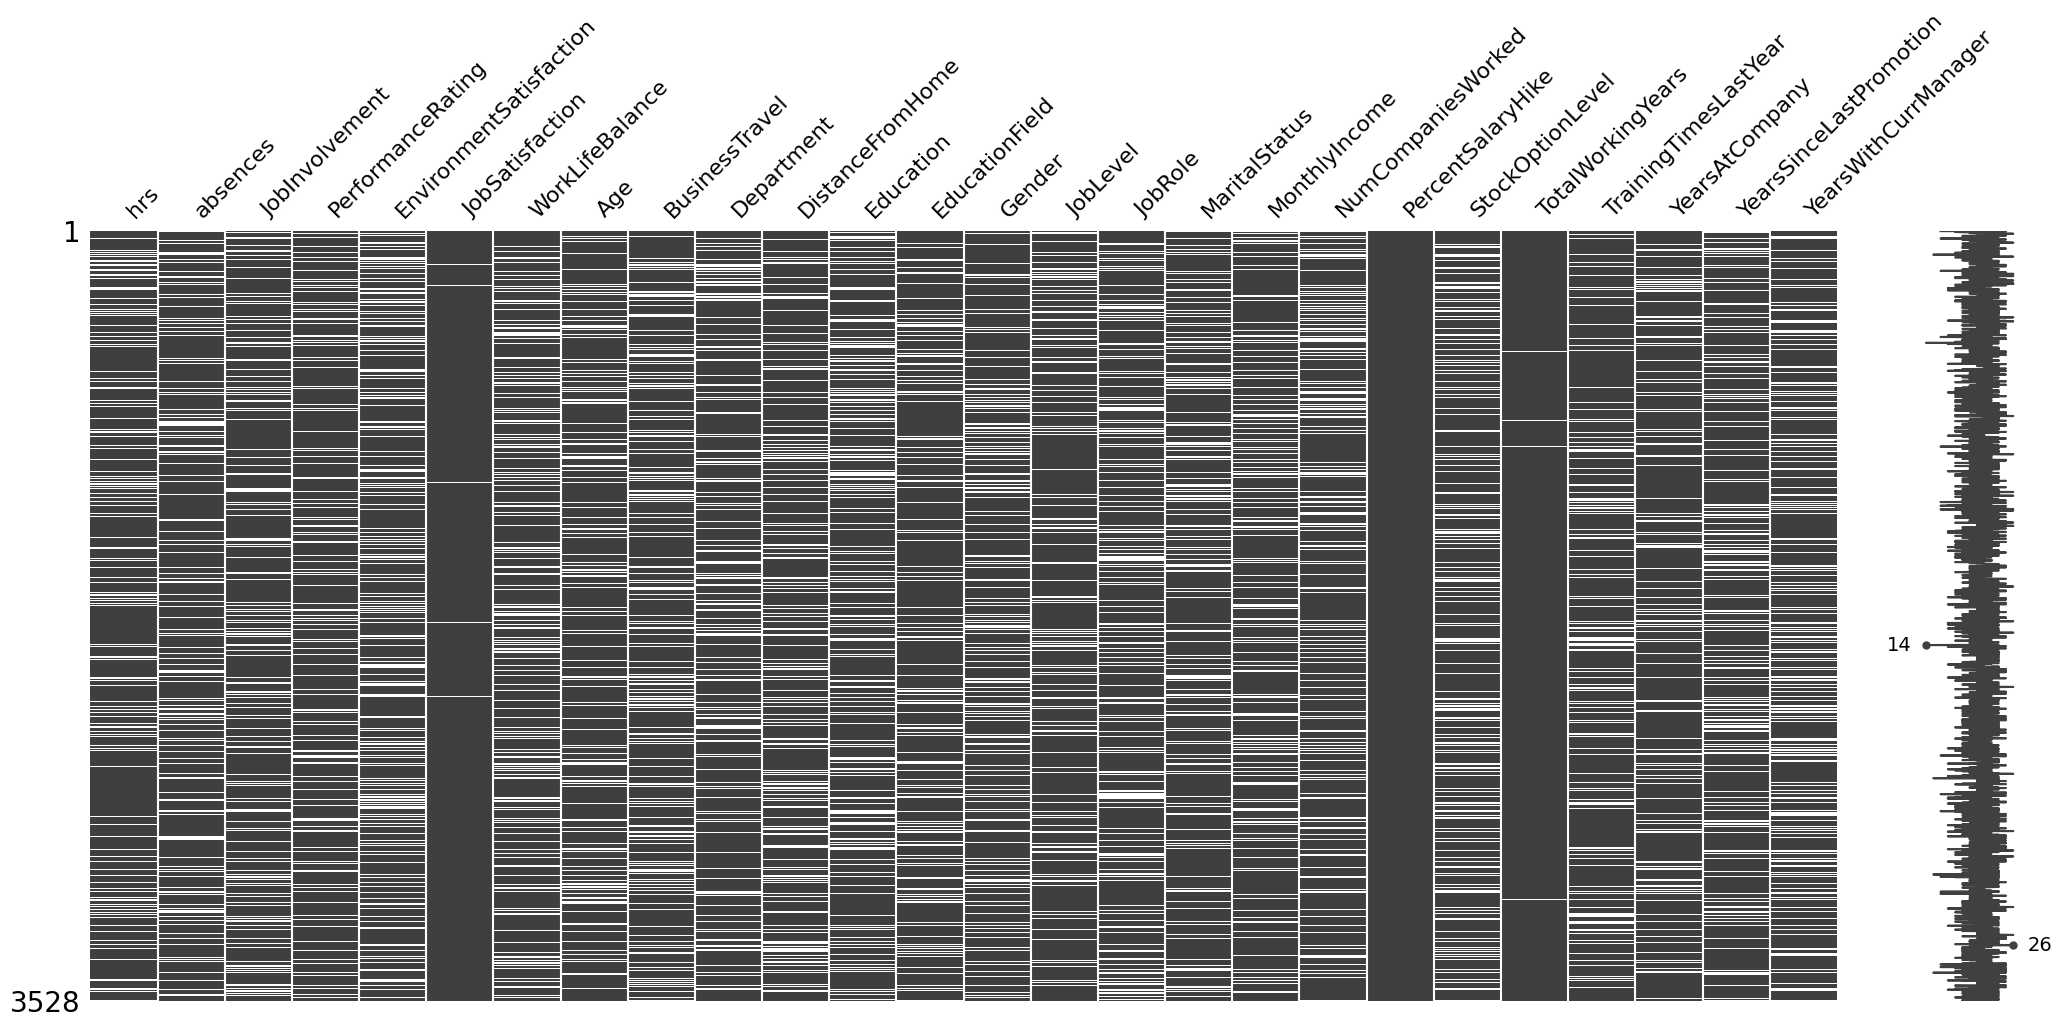

In [69]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'

msno.matrix(X_train)
plt.show()

No tenemos ninguna columna con excesivos valores nulos teniendo en cuenta que contamos con casi 4000 filas, por lo que no vamos a eliminar ninguna

## Codificamos la salida

In [70]:
le = preprocessing.LabelEncoder()
le.fit(y)

y_test = le.transform(y_test)
y_train = le.transform (y_train)

## Pipeline para variables numéricas y categóricas

In [71]:
#Identificamos las veriables numéricas
cat_cols = X_train.select_dtypes(include="object").columns
num_cols = X_train.select_dtypes(exclude="object").columns

In [72]:
num_cols

Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [73]:
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('pca', PCA(n_components=5))
])

In [74]:
num_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', RobustScaler())
])

In [75]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer, cat_cols),
        ('num', num_transformer, num_cols)
    ])

In [76]:
preprocessor

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('pca', PCA(n_components=5))]),
                                 Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')),
                                ('num',
                                 Pipeline(steps=[('imputer', KNNImpute...
                                 Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object'))])

# Modelos

In [77]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight='balanced'))])


In [78]:
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('pca',
                                                                   PCA(n_components=5))]),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')),
                                                 ('num',
                                                  Pipe...
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object'))])),
                ('classifier', LogisticRegression(class_weight='balanced'))])

In [79]:
cross_val_score(clf, X_train, y_train, cv=5, scoring="balanced_accuracy").mean()

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `spa

0.6923217624558802

## Ajuste de hiperparámetros para el modelo LogisticRegression

In [80]:
# Creamos el modelo
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(class_weight='balanced'))])
# Hiperparámetros del preprocesamiento de las variables numéricas
num_transformer_dist = {'preprocessor__num__imputer__n_neighbors': list(range(2, 15)),
                        'preprocessor__num__imputer__add_indicator': [True, False]}
# Hiperparámetros del preprocesamiento de las variables categóricas
cat_transformer_dist = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__imputer__add_indicator': [True, False],
                        'preprocessor__cat__pca__n_components': list(range(2, 15))}
# Hiperparámetros del modelo
param_grid_LR = {'classifier__penalty': ['l1', 'l2', 'elasticnet'], 
                 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Se crea un diccionario con todos los hiperparámetros
param_grid = {**num_transformer_dist, **cat_transformer_dist, **param_grid_LR}

# Variable que representa el número de iteraciones que se van a realizar en el ajuste
budget = 200 # Cambiar si tarda mucho

# Realizamos el ajuste de hiperparámetros utilizando RandomizedSearchCV
np.random.seed(36)
grid_search_LR = RandomizedSearchCV(clf,
                                    param_grid,
                                    scoring='balanced_accuracy',
                                    cv=5,
                                    refit=True,
                                    n_jobs=-1,
                                    verbose=1,
                                    return_train_score=True,
                                    n_iter = budget)

grid_search_LR.fit(X_train, y_train)
print("Mejores hiperparámetros: {}".format(grid_search_LR.best_params_))
print("Mejor puntuación: {:.2f}".format(grid_search_LR.best_score_))
# Realizamos predicciones del modelo
y_pred_lr = grid_search_LR.predict(X_test)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
530 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^

Mejores hiperparámetros: {'preprocessor__num__imputer__n_neighbors': 2, 'preprocessor__num__imputer__add_indicator': False, 'preprocessor__cat__pca__n_components': 3, 'preprocessor__cat__imputer__strategy': 'constant', 'preprocessor__cat__imputer__add_indicator': False, 'classifier__solver': 'saga', 'classifier__penalty': 'l1', 'classifier__C': 0.1}
Mejor puntuación: 0.70


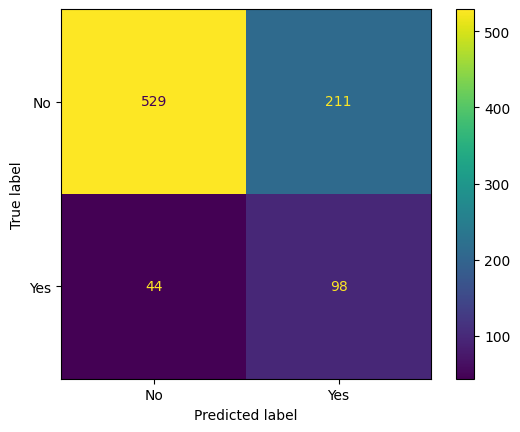

In [81]:
labels = ['No', 'Yes']
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

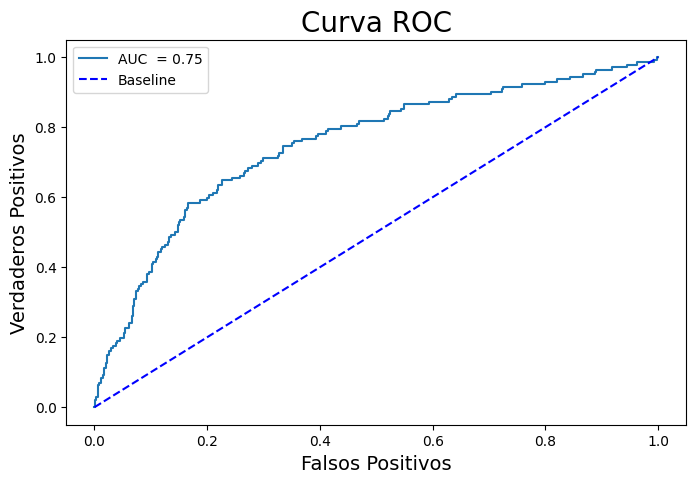

In [82]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = grid_search_LR.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

## Ajuste de hiperparámetros de los modelos de boosting

### LightGBM

In [83]:
# Creamos el modelo
clf_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LGBMClassifier(class_weight= 'balanced'))])
# Hiperparámetros del preprocesamiento de las variables numéricas
num_transformer_dist = {'preprocessor__num__imputer__n_neighbors': list(range(2, 15)),
                        'preprocessor__num__imputer__add_indicator': [True, False]}
# Hiperparámetros del preprocesamiento de las variables categóricas
cat_transformer_dist = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__imputer__add_indicator': [True, False],
                        'preprocessor__cat__pca__n_components': list(range(2, 15))}
# Hiperparámetros del modelo
param_grid_LGBM = {'classifier__n_estimators'     : sp_randint(100, 5000),
              'classifier__max_depth'        : [-1, 1, 3, 5, 10, 20],
              'classifier__subsample'        : [0.5, 1],
              'classifier__learning_rate'    : [0.001, 0.01, 0.1],
              'classifier__boosting_type'    : ['gbdt']
             }
# Se crea un diccionario con todos los hiperparámetros
param_grid = {**num_transformer_dist, **cat_transformer_dist, **param_grid_LGBM}

# Variable que representa el número de iteraciones que se van a realizar en el ajuste
budget = 200 # Cambiar si tarda mucho

# Realizamos el ajuste de hiperparámetros utilizando RandomizedSearchCV
np.random.seed(36)
regr_lgbm = RandomizedSearchCV(
        estimator  = clf_lgbm,
        param_distributions = param_grid,
        scoring    = 'balanced_accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        refit      = True,
        verbose    = 0,
        return_train_score = True,
        n_iter=budget
       )


regr_lgbm.fit(X = X_train, y = y_train)


print("Mejores hiperparámetros: ", regr_lgbm.best_params_)

# Realizamos predicciones del modelo
y_pred_lgbm = regr_lgbm.predict(X_test)
print("Mejor puntuación: {:.2f}".format(regr_lgbm.best_score_))

c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mejores hiperparámetros:  {'classifier__boosting_type': 'gbdt', 'classifier__learning_rate': 0.1, 'classifier__max_depth': 20, 'classifier__n_estimators': 4598, 'classifier__subsample': 0.5, 'preprocessor__cat__imputer__add_indicator': False, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__cat__pca__n_components': 4, 'preprocessor__num__imputer__add_indicator': False, 'preprocessor__num__imputer__n_neighbors': 2}
Mejor puntuación: 0.83


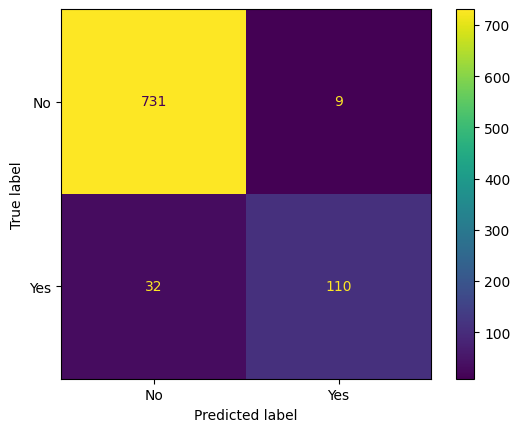

In [84]:
labels = ['No', 'Yes']
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_lgbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

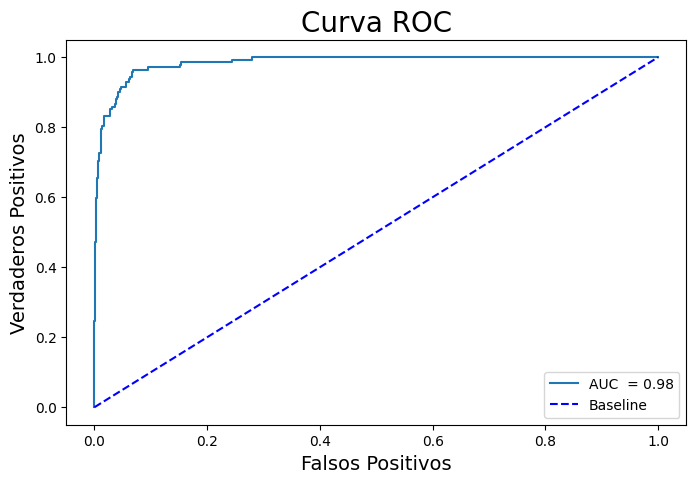

In [85]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = regr_lgbm.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

### Gradient Boosting Classifier

In [86]:
# Creamos el modelo
gbc_h = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', HistGradientBoostingClassifier(class_weight='balanced'))])
# Hiperparámetros del preprocesamiento de las variables numéricas
num_transformer_dist = {'preprocessor__num__imputer__n_neighbors': list(range(2, 15)),
                        'preprocessor__num__imputer__add_indicator': [True, False]}
# Hiperparámetros del preprocesamiento de las variables categóricas
cat_transformer_dist = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__imputer__add_indicator': [True, False],
                        'preprocessor__cat__pca__n_components': list(range(2, 15))}

# Hiperparámetros del modelo
param_grid_gbc_h = {'classifier__max_depth'         : [None, 1, 3, 5, 10, 20],
                'classifier__learning_rate'     : [0.001, 0.01, 0.1, 0.2]
             }
# Se crea un diccionario con todos los hiperparámetros
param_grid = {**num_transformer_dist, **cat_transformer_dist, **param_grid_gbc_h}

budget = 200 # Cambiar si tarda mucho

# Realizamos el ajuste de hiperparámetros utilizando RandomizedSearchCV
np.random.seed(36)
clf_gb = RandomizedSearchCV (estimator  = gbc_h,
                           param_distributions = param_grid,
                           scoring='balanced_accuracy',
                           cv=5,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           n_iter=budget,
                           return_train_score=True)


clf_gb.fit(X=X_train, y=y_train)
print("Mejores hiperparámetros: {}".format(clf_gb.best_params_))
print("Mejor puntuación: {:.2f}".format(clf_gb.best_score_))    
y_pred_gb = clf_gb.predict(X_test)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Mejores hiperparámetros: {'preprocessor__num__imputer__n_neighbors': 4, 'preprocessor__num__imputer__add_indicator': False, 'preprocessor__cat__pca__n_components': 11, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__cat__imputer__add_indicator': False, 'classifier__max_depth': 5, 'classifier__learning_rate': 0.2}
Mejor puntuación: 0.81


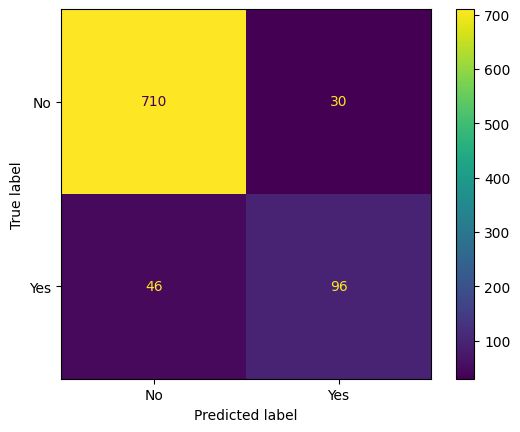

In [87]:
labels = ['No', 'Yes']
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

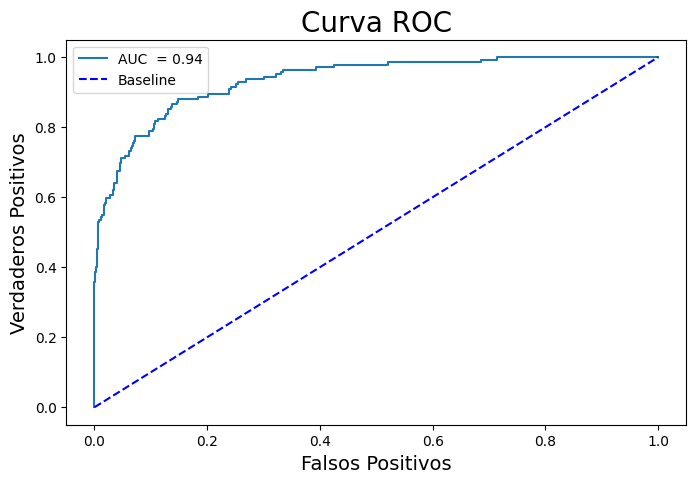

In [88]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = clf_gb.predict_proba(X_test)[:, 1]

auc = metrics.roc_auc_score(y_test, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

# Conclusiones

In [89]:
le = LabelEncoder()
y_test_t = le.fit_transform(y_test)
y_pred_lr_t = le.fit_transform(y_pred_lr)
y_pred_lgbm_t = le.fit_transform(y_pred_lgbm)
y_pred_gb_t = le.fit_transform(y_pred_gb)

balance_acc_lr = balanced_accuracy_score(y_test_t, y_pred_lr_t)
balance_acc_lgbm = balanced_accuracy_score(y_test_t, y_pred_lgbm_t)
balance_acc_gb = balanced_accuracy_score(y_test_t, y_pred_gb_t)


nombres = ["Logistic Regression", "LightGBM", "Gradient Boosting"]
scores = [balance_acc_lr, balance_acc_lgbm, balance_acc_gb]
conclusiones = {'Modelos': nombres,
                'Score' : scores}
tabla = pd.DataFrame(conclusiones)
tabla




,Modelos,Score
0,Logistic Regression,0.702503
1,LightGBM,0.881243
2,Gradient Boosting,0.817758


(0.65, 0.9)

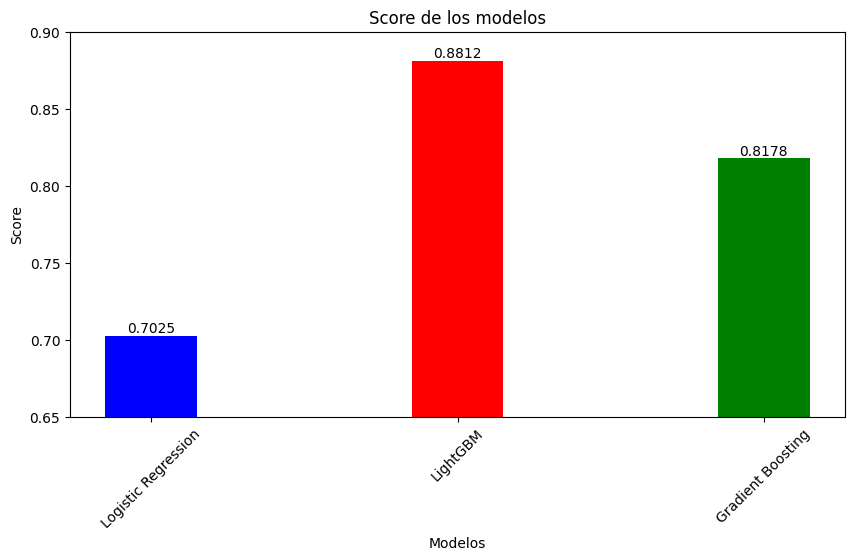

In [90]:
# Histograma que muestra los errores RMSE de los distintos modelos
fig, ax = plt.subplots(figsize = (10,5))
score_modelos = [balance_acc_lr, balance_acc_lgbm, balance_acc_gb]
for i in range(3):
    plt.text(i, score_modelos[i], round(score_modelos[i], 4), ha='center', va='bottom')
modelos = conclusiones['Modelos']
puntuaciones = conclusiones['Score']

indice_modelos = np.arange(len(modelos))

ax.bar(indice_modelos, puntuaciones, color=['blue', 'red', 'green'], width=0.3, align='center')
ax.set_xticks(indice_modelos)
ax.set_xticklabels(modelos, rotation=45)

ax.set_xlabel('Modelos')
ax.set_ylabel('Score')
ax.set_title('Score de los modelos')
ax.set_ylim([0.65, 0.9])


Como podemos observar, el mejor modelo es LightGBM, con una gran diferencia respecto del otro modelo de Boosting. Pensamos que esto se debe a que LightGBM es un modelo muy preciso que se adapta bien a los problemas complejos que puedan tener sobreajuste. En este caso, pensamos que hay algo de sobreajuste y por eso LightGBM tiene mejores resultados que Gradient Boosting.

Por otro lado, podemos ver que la regresión logística tiene unos resultados muy inferiores a los demás modelos. Creemos que se debe a que este modelo es útil en problemas de clasificación binaria simples, por lo que al tratarse de un problema complejo con un gran número de variables los resultados empeoran.

# Selección de atributos

In [91]:
cat_cols2 = X_train.select_dtypes(include="object").columns
num_cols2 = X_train.select_dtypes(exclude="object").columns

In [92]:
cat_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('pca', PCA(n_components=5))
])

In [93]:
num_transformer2 = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', MinMaxScaler())
])

In [94]:
preprocessor2 = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer2, cat_cols2),
        ('num', num_transformer2, num_cols2)
    ])

In [95]:
threshold = 12 # el número de características más relevantes
preprocessor2.fit(X_train)
transformers = preprocessor2.named_transformers_.values()
preprocessor_cols = [col for transformer in transformers for col in transformer.get_feature_names_out()]
X_preprocessed = pd.DataFrame(preprocessor2.fit_transform(X), columns=preprocessor_cols)
high_score_features = []
feature_scores = f_classif(X_preprocessed, y)[0]

for score, f_name in sorted(zip(feature_scores, X_preprocessed.columns), reverse=True)[:threshold]:
    print(f_name, score)
    high_score_features.append(f_name)

df_fc = X_preprocessed[high_score_features]
print(df_fc.columns)

hrs 144.7848152755276
TotalWorkingYears 132.43333063085439
Age 112.85621717609595
YearsWithCurrManager 106.5865437596637
YearsAtCompany 87.00773435312848
JobSatisfaction 46.84060132017516
EnvironmentSatisfaction 33.90012817759464
pca2 33.446953607487465
pca1 16.039346454026234
TrainingTimesLastYear 11.828040353286008
WorkLifeBalance 10.905396317514915
YearsSinceLastPromotion 8.07075537997988
Index(['hrs', 'TotalWorkingYears', 'Age', 'YearsWithCurrManager',
       'YearsAtCompany', 'JobSatisfaction', 'EnvironmentSatisfaction', 'pca2',
       'pca1', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsSinceLastPromotion'],
      dtype='object')


In [96]:
df_fc

,hrs,TotalWorkingYears,Age,YearsWithCurrManager,YearsAtCompany,JobSatisfaction,EnvironmentSatisfaction,pca2,pca1,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
0,0.343551,0.150,0.309524,0.235294,0.125,0.333333,0.666667,-1.050521,0.265505,0.433333,0.800000,0.066667
1,0.186144,0.125,0.238095,0.000000,0.000,0.666667,0.600000,0.401321,-0.605235,0.366667,0.400000,0.000000
2,0.625245,0.250,0.690476,0.529412,0.250,0.333333,0.000000,-0.055909,-0.693472,0.666667,0.333333,0.600000
3,0.959330,0.475,0.619048,0.141176,0.025,0.666667,1.000000,-0.557080,0.215757,0.333333,0.000000,0.000000
4,0.768807,0.125,0.190476,0.117647,0.075,0.333333,0.000000,0.316429,-0.551591,0.600000,0.666667,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
4405,0.524655,0.250,0.547619,0.117647,0.075,0.000000,1.000000,-0.666098,0.332022,0.833333,0.666667,0.000000
4406,0.085703,0.250,0.566667,0.117647,0.075,1.000000,0.400000,-0.432021,0.087330,0.333333,0.666667,0.000000
4407,0.396044,0.125,0.166667,0.117647,0.100,0.666667,0.000000,0.135367,-0.789016,0.666667,0.666667,0.066667
4408,0.682603,0.250,0.571429,0.470588,0.225,0.000000,1.000000,-0.432021,0.087330,0.333333,0.666667,0.466667


## División en conjuntos de entrenamiento y test

In [97]:
df_r = df[list(df_fc.columns[0:7]) + list(df_fc.columns[9:12])]

#Declaramos nuestras nuevas variables de entrada
X2 = df_r
#Dividimos los dantos en conjuntos para entrernar y para tests
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, stratify=y, test_size=0.2)
le = preprocessing.LabelEncoder()
le.fit(y)

y_test2 = le.transform(y_test2)
y_train2 = le.transform (y_train2)
df_r

,hrs,TotalWorkingYears,Age,YearsWithCurrManager,YearsAtCompany,JobSatisfaction,EnvironmentSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion
1,NaN,6.0,31.0,4.0,5.0,2.0,3.0,NaN,NaN,1.0
6,6.450877,5.0,28.0,0.0,0.0,3.0,NaN,NaN,NaN,0.0
13,8.871421,10.0,47.0,9.0,10.0,2.0,1.0,4.0,2.0,9.0
28,10.713066,19.0,44.0,NaN,1.0,3.0,4.0,2.0,1.0,0.0
30,9.662808,5.0,26.0,2.0,3.0,2.0,1.0,NaN,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4405,8.316921,10.0,NaN,2.0,3.0,1.0,4.0,5.0,3.0,0.0
4406,5.897197,10.0,NaN,2.0,3.0,4.0,NaN,2.0,3.0,0.0
4407,NaN,5.0,25.0,2.0,4.0,3.0,1.0,4.0,3.0,1.0
4408,9.187612,10.0,42.0,8.0,9.0,1.0,4.0,2.0,3.0,7.0


In [98]:
cat_cols3 = X_train2.select_dtypes(include="object").columns
num_cols3 = X_train2.select_dtypes(exclude="object").columns

In [99]:
cat_transformer3 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)),
    ('pca', PCA(n_components=5))
])

In [100]:
num_transformer3 = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=5)),
    ('scaler', MinMaxScaler())
])

In [101]:
preprocessor3 = ColumnTransformer(
    transformers=[
        ('cat', cat_transformer3, cat_cols3),
        ('num', num_transformer3, num_cols3)
    ])

## Ajuste de hiperparámetros de Logistic Regression

In [102]:
# Creamos el modelo
clf_r = Pipeline(steps=[('preprocessor', preprocessor3),
                      ('classifier', LogisticRegression(class_weight='balanced'))])
# Hiperparámetros del preprocesamiento de las variables numéricas
num_transformer_dist = {'preprocessor__num__imputer__n_neighbors': list(range(2, 15)),
                        'preprocessor__num__imputer__add_indicator': [True, False]}
# Hiperparámetros del preprocesamiento de las variables categóricas
cat_transformer_dist = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__imputer__add_indicator': [True, False],
                        'preprocessor__cat__pca__n_components': list(range(2, 15))}
# Hiperparámetros del modelo
param_grid_LR = {'classifier__penalty': ['l1', 'l2', 'elasticnet'], 
                 'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                 'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Se crea un diccionario con todos los hiperparámetros
param_grid = {**num_transformer_dist, **cat_transformer_dist, **param_grid_LR}

budget = 200 # Cambiar si tarda mucho
np.random.seed(36)
grid_search_LR_r = RandomizedSearchCV(clf_r,
                                    param_grid,
                                    scoring='balanced_accuracy',
                                    cv=5,
                                    refit=True,
                                    n_jobs=-1,
                                    verbose=1,
                                    return_train_score=True,
                                    n_iter = budget)

grid_search_LR_r.fit(X_train2, y_train2)
print("Mejores hiperparámetros: {}".format(grid_search_LR_r.best_params_))
print("Mejor puntuación: {:.2f}".format(grid_search_LR_r.best_score_))
# Realizamos predicciones del modelo
y_pred_lr_r = grid_search_LR_r.predict(X_test2)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
530 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python311\Lib\site-packages\sklearn\pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^

Mejores hiperparámetros: {'preprocessor__num__imputer__n_neighbors': 2, 'preprocessor__num__imputer__add_indicator': False, 'preprocessor__cat__pca__n_components': 5, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__cat__imputer__add_indicator': False, 'classifier__solver': 'sag', 'classifier__penalty': 'l2', 'classifier__C': 10}
Mejor puntuación: 0.69


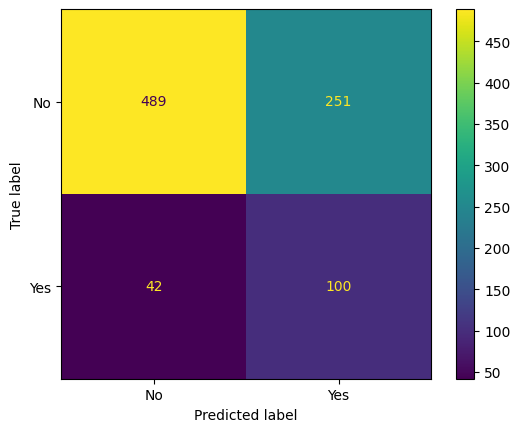

In [103]:
labels = ['No', 'Yes']
# Matriz de confusión
cm = confusion_matrix(y_test2, y_pred_lr_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

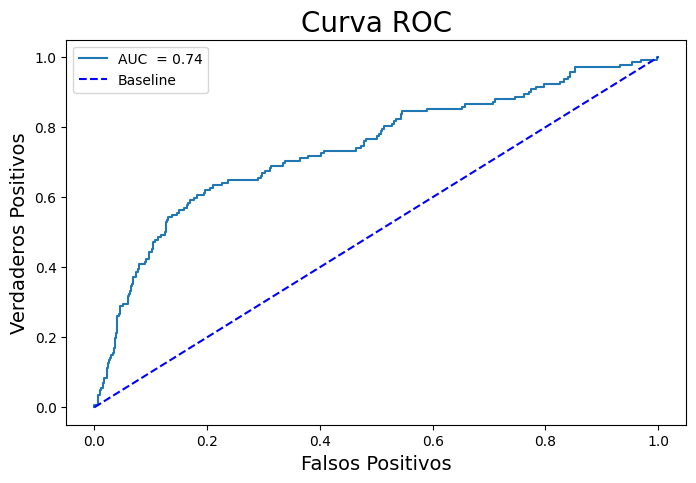

In [104]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = grid_search_LR_r.predict_proba(X_test2)[:, 1]

auc = metrics.roc_auc_score(y_test2, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test2, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

## Ajuste de hiperparámetros de los modelos de Boosting

### Ajuste de hiperparámetros de LightGBM

In [105]:
# Creamos el modelo
clf_lgbm_r = Pipeline(steps=[('preprocessor', preprocessor3),
                      ('classifier', LGBMClassifier(class_weight= 'balanced'))])
# Hiperparámetros del preprocesamiento de las variables numéricas
num_transformer_dist = {'preprocessor__num__imputer__n_neighbors': list(range(2, 15)),
                        'preprocessor__num__imputer__add_indicator': [True, False]}
# Hiperparámetros del preprocesamiento de las variables categóricas
cat_transformer_dist = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__imputer__add_indicator': [True, False],
                        'preprocessor__cat__pca__n_components': list(range(2, 15))}
# Hiperparámetros del modelo
param_grid_LGBM = {'classifier__n_estimators'     : sp_randint(100, 5000),
              'classifier__max_depth'        : [-1, 1, 3, 5, 10, 20],
              'classifier__subsample'        : [0.5, 1],
              'classifier__learning_rate'    : [0.001, 0.01, 0.1],
              'classifier__boosting_type'    : ['gbdt']
             }

param_grid = {**num_transformer_dist, **cat_transformer_dist, **param_grid_LGBM}
# Variable que representa el número de iteraciones que se van a realizar en el ajuste
budget = 200 # Cambiar si tarda mucho
# Realizamos el ajuste de hiperparámetros utilizando RandomizedSearchCV
np.random.seed(36)
regr_lgbm_r = RandomizedSearchCV(
        estimator  = clf_lgbm_r,
        param_distributions = param_grid,
        scoring    = 'balanced_accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = 5, 
        refit      = True,
        verbose    = 0,
        return_train_score = True,
        n_iter=budget
       )


regr_lgbm_r.fit(X_train2, y_train2)


print("Mejores hiperparámetros: ", regr_lgbm_r.best_params_)
print("Mejor puntuación: {:.2f}".format(regr_lgbm_r.best_score_))
# Realizamos predicciones del modelo
y_pred_lgbm_r = regr_lgbm_r.predict(X_test2)

Mejores hiperparámetros:  {'classifier__boosting_type': 'gbdt', 'classifier__learning_rate': 0.1, 'classifier__max_depth': -1, 'classifier__n_estimators': 2076, 'classifier__subsample': 1, 'preprocessor__cat__imputer__add_indicator': True, 'preprocessor__cat__imputer__strategy': 'constant', 'preprocessor__cat__pca__n_components': 8, 'preprocessor__num__imputer__add_indicator': False, 'preprocessor__num__imputer__n_neighbors': 2}
Mejor puntuación: 0.84


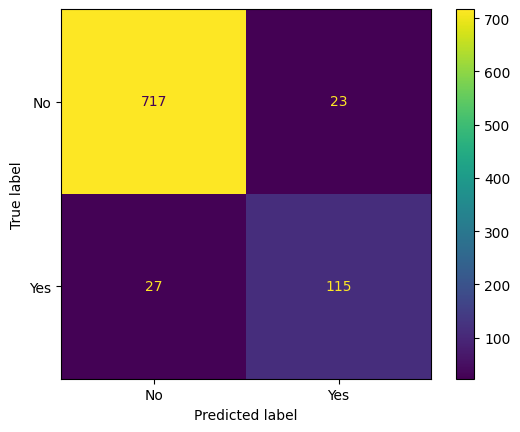

In [106]:
labels = ['No', 'Yes']
# Matriz de confusión
cm = confusion_matrix(y_test2, y_pred_lgbm_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

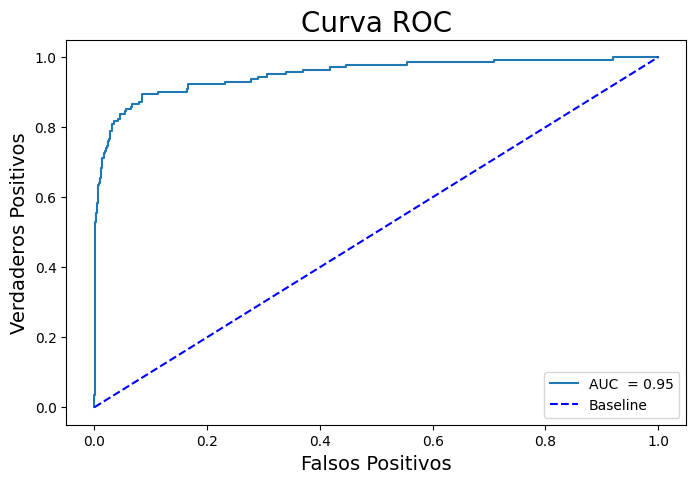

In [107]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)

probs = regr_lgbm_r.predict_proba(X_test2)[:, 1]

auc = metrics.roc_auc_score(y_test2, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test2, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

### Ajuste de hiperparámetros de Gradient Boosting Classifier

In [108]:
# Creamos el modelo
gbc_h_r = Pipeline(steps=[('preprocessor', preprocessor3),
                      ('classifier', HistGradientBoostingClassifier(class_weight='balanced'))])
# Hiperparámetros del preprocesamiento de las variables numéricas
num_transformer_dist = {'preprocessor__num__imputer__n_neighbors': list(range(2, 15)),
                        'preprocessor__num__imputer__add_indicator': [True, False]}
# Hiperparámetros del preprocesamiento de las variables categóricas
cat_transformer_dist = {'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
                        'preprocessor__cat__imputer__add_indicator': [True, False],
                        'preprocessor__cat__pca__n_components': list(range(2, 15))}

# Hiperparámetros del modelo
param_grid_gbc_h = {'classifier__max_depth'         : [None, 1, 3, 5, 10, 20],
                'classifier__learning_rate'     : [0.001, 0.01, 0.1, 0.2]
             }
# Se crea un diccionario con todos los hiperparámetros
param_grid = {**num_transformer_dist, **cat_transformer_dist, **param_grid_gbc_h}

# Variable que representa el número de iteraciones que se van a realizar en el ajuste
budget = 200 # Cambiar si tarda mucho

# Realizamos el ajuste de hiperparámetros utilizando RandomizedSearchCV
np.random.seed(36)
clf_gb_r = RandomizedSearchCV (estimator  = gbc_h_r,
                           param_distributions = param_grid,
                           scoring='balanced_accuracy',
                           cv=5,
                           refit=True,
                           n_jobs=-1,
                           verbose=1,
                           n_iter=budget,
                           return_train_score=True)


clf_gb_r.fit(X_train2, y_train2)
print("Mejores hiperparámetros: {}".format(clf_gb_r.best_params_))
print("Mejor puntuación: {:.2f}".format(clf_gb_r.best_score_))    
y_pred_gb_r = clf_gb_r.predict(X_test2)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Mejores hiperparámetros: {'preprocessor__num__imputer__n_neighbors': 2, 'preprocessor__num__imputer__add_indicator': False, 'preprocessor__cat__pca__n_components': 12, 'preprocessor__cat__imputer__strategy': 'constant', 'preprocessor__cat__imputer__add_indicator': False, 'classifier__max_depth': 20, 'classifier__learning_rate': 0.1}
Mejor puntuación: 0.85


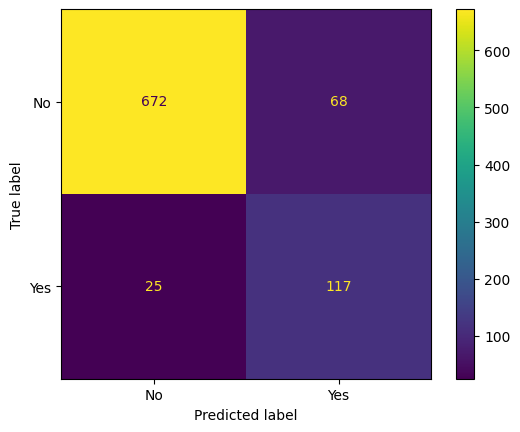

In [109]:
labels = ['No', 'Yes']
# Matriz de confusión
cm = confusion_matrix(y_test2, y_pred_gb_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.show()

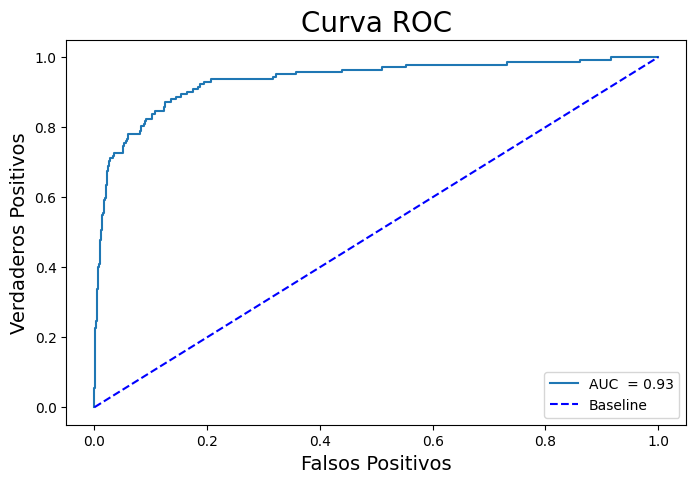

In [110]:
#Obtenemos las curva ROC y el área bajo la curva (AUC)
probs = clf_gb_r.predict_proba(X_test2)[:, 1]

auc = metrics.roc_auc_score(y_test2, probs)
fpr, tpr, thresholds = metrics.roc_curve(y_test2, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'AUC  = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('Curva ROC', size=20)
plt.xlabel('Falsos Positivos', size=14)
plt.ylabel('Verdaderos Positivos', size=14)
plt.legend();

## Conclusiones sobre la selección de atributos

In [111]:
le = LabelEncoder()
y_test_t_r = le.fit_transform(y_test2)
y_pred_lr_t_r = le.fit_transform(y_pred_lr_r)
y_pred_lgbm_t_r = le.fit_transform(y_pred_lgbm_r)
y_pred_gb_t_r = le.fit_transform(y_pred_gb_r)

balance_acc_lr_r = balanced_accuracy_score(y_test_t_r, y_pred_lr_t_r)
balance_acc_lgbm_r = balanced_accuracy_score(y_test_t_r, y_pred_lgbm_t_r)
balance_acc_gb_r = balanced_accuracy_score(y_test_t_r, y_pred_gb_t_r)


nombres = ["Logistic Regression", "Logistic Regression selección de atributos", "LightGBM", "LightGBM selección de atributos", "Gradient Boosting", "Gradient Boosting selección de atributos"]
scores = [balance_acc_lr, balance_acc_lr_r, balance_acc_lgbm, balance_acc_lgbm_r, balance_acc_gb, balance_acc_gb_r]
conclusiones = {'Modelos': nombres,
                'Score' : scores}
tabla = pd.DataFrame(conclusiones)
tabla


,Modelos,Score
0,Logistic Regression,0.702503
1,Logistic Regression selección de atributos,0.682518
2,LightGBM,0.881243
3,LightGBM selección de atributos,0.889389
4,Gradient Boosting,0.817758
5,Gradient Boosting selección de atributos,0.866026


(0.65, 0.92)

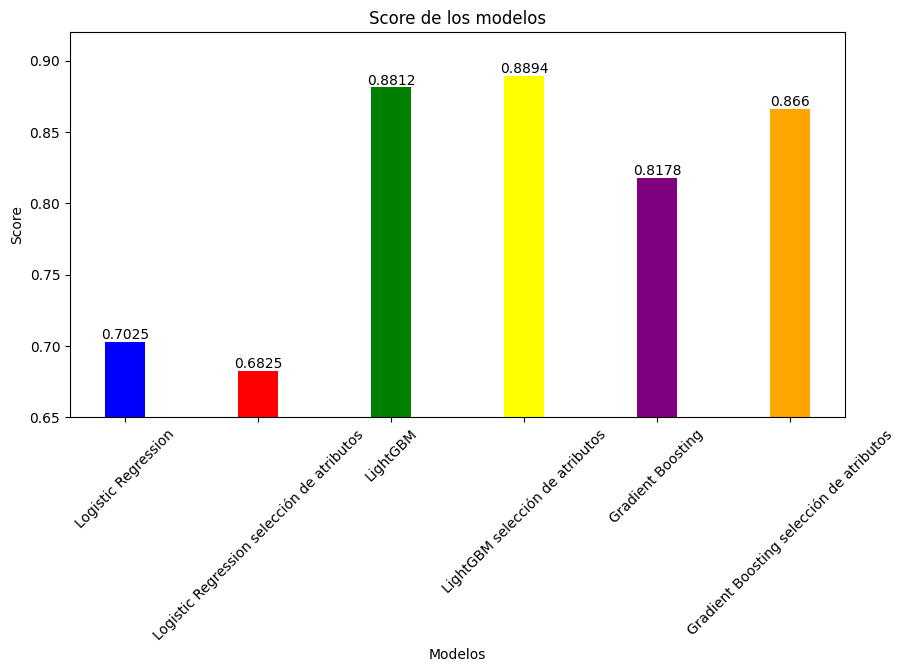

In [112]:
# Histograma que muestra los errores RMSE de los distintos modelos
fig, ax = plt.subplots(figsize = (10,5))
score_modelos = [balance_acc_lr, balance_acc_lr_r, balance_acc_lgbm, balance_acc_lgbm_r, balance_acc_gb, balance_acc_gb_r]
for i in range(6):
    plt.text(i, score_modelos[i], round(score_modelos[i], 4), ha='center', va='bottom')
modelos = conclusiones['Modelos']
puntuaciones = conclusiones['Score']

indice_modelos = np.arange(len(modelos))

ax.bar(indice_modelos, puntuaciones, color=['blue', 'red', 'green', 'yellow', 'purple', 'orange'], width=0.3, align='center')
ax.set_xticks(indice_modelos)
ax.set_xticklabels(modelos, rotation=45)

ax.set_xlabel('Modelos')
ax.set_ylabel('Score')
ax.set_title('Score de los modelos')
ax.set_ylim([0.65, 0.92])

Como podemos observar, los resultados han mejorado considerablemente al realizar la selección de atributos. Pensamos que esto se debe a que había muchas variables que introducían ruido en el problema y al eliminarlas los resultados han mejorado. La mejora es pequeña en la regresión logística y en LightGBM, pero muy grande en Gradient Boosting. Pensamos que esto se debe a que hemos reducido el sobreajuste, ya que al reducir el número de variables hemos creado un problema mucho menos complejo al que los modelos pueden adaptarse mejor al recibir datos de test que no han visto antes. Como Gradient Boosting empeora en gran medida sus resultados cuando el modelo tiene sobreajuste, al reducirlo hemos mejorado considerablemente sus resultados.
Por otro lado, como LightGBM se adapta bien al sobreajuste, podemos ver que los resultados han mejorado, pero no tanto como Gradient Boosting.

# Modelo Final

Para el modelo final hemos decidido


In [113]:
with open('modelo_final.pkl', 'wb') as final_model_pkl:
    pickle.dump(regr_lgbm_r, final_model_pkl)